In [1]:
using JLD, CairoMakie

In [2]:
Λs = load("LSE_right_space_5000_points.jld")["data"]
u0s = load("u0s_right_space_5000_points.jld")["data"];

In [3]:
Λs[:, 3] = replace!(Λs[:, 3], -Inf=>0);
Λs[:, 3] = replace!(Λs[:, 3], 0=>minimum(Λs[:, 3]));

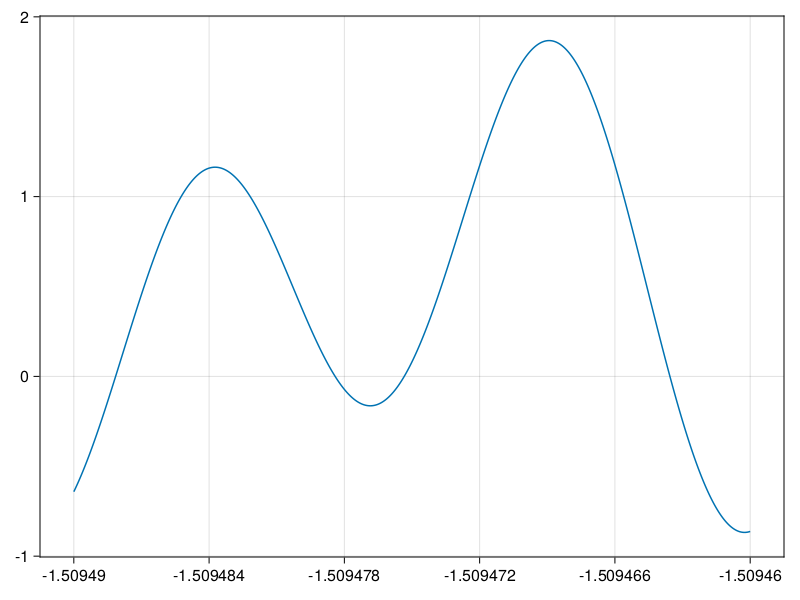

In [11]:
r1 = range( -1.509460, -1.509490, length = 5001 )  # original range, but with 5001 samples
y = (sin.(r1.*400000) .+ cos.(r1.*100000).^2)   # dummy data

# r1_ = 1:5001  # this range should have no discretization issues for Float32
r1_ = 5001:-1:1  # oops should reverse this.
tickvals = r1_[1:1000:end]  # manually selecting tick locations
ticklabels = string.(r1[1:1000:end])  # select corresponding tick locations in original range
lines(r1_, y; axis=(xticks=(tickvals, ticklabels),))  # use clever makie trick ;)

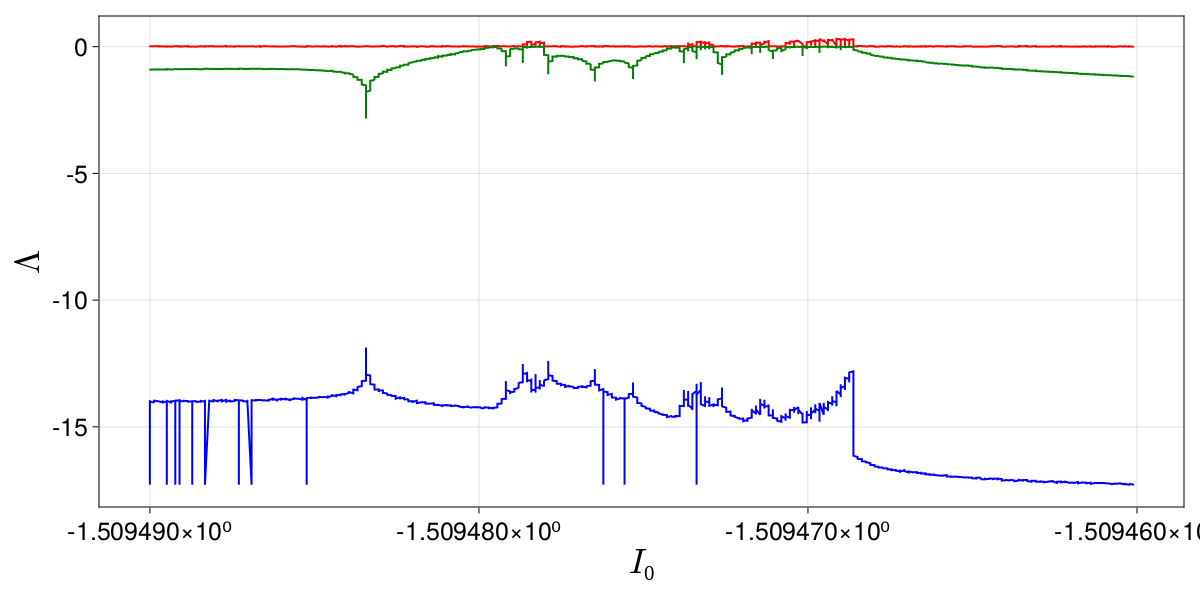

In [8]:
I0range = range( -1.509460, -1.509490, length = 5000 )
f = Figure(resolution = (1200, 600))
axis = Axis(f[1, 1], xlabel = L"I_0", ylabel = L"\Lambda", xlabelsize = 35, ylabelsize = 35,
            xticklabelsize = 25,yticklabelsize = 25 )
lines!(axis, I0range, Λs[:, 1], color = :red, linewidth = 2.0)
lines!(axis, I0range, Λs[:, 2], color = :green, linewidth = 2.0)
lines!(axis, I0range, Λs[:, 3], color = :blue, linewidth = 2.0)
f